# LLC plotting 

This enables to identify mooring arrays and overlay the track of the arry over 2D surface fields, Ocean depth by default, without the need
to compute cutout regions that can be numerically expensive on large datasets (LLC2160 and LLC4320).


# od.plot.faces_array 
Plots several faces, as long as the data is described in the face_connection dictionary. It can figure out, in many cases how to best plot data in
multiple faces on subplot grid.

It also provides enough flexibility to take custom faces-orientation. For that, the user needs to provide the argument `faces2axis`, a dictionary
of the form:
```python
faces2axis = {count: (face_number, Y_pos, X_pos)}
```

where is an index identifying a face, so that $count \in range(len(faces))$. `face_number` refers to the `face` of the data values, i.e. if ECCO or LLC4320, $face\in[0, 12]$. `(Y_pos, X_pos)` refers to the grid subplot position created by `plt.subplots()`.

## 

### To run notebook on Sciserver

You need to install the active PR branch from Miguel's repository. Assuming this notebook is currently on Sciserver all that is needed is to install the active dev branch. Here are the steps:
1. Open a terminal and activate the Oceanography env
```python
$ mamba activate Oceanography
```
2. Remove oceanspy
```python
$ python -m pip uninstall oceanspy
```
3. Install the forked branch from Miguel's repo tied to the PR.
```python
$ pip install git+https://github.com/Mikejmnez/oceanspy.git@iss410
```
4. Restart the notebook.

# The objective of this notebook 

Is to demonstrate basic plotting functionality of <ins>mooring arrays (or station arrays)</ins> within oceanspy. It is fast because it does not depend on 
cutout, and uses the same basic code that `mooring_array with serial=True` to compute arrays. Here are some of its properties: 
* The plotting is done in logical index space, rather than lat lon. Canno add geographical lat/lon contours.
* When the array spans 1 face, 2 faces or a facet (3 faces aligned in the geographic North, like faces 0, 1, 2 ) the code will correctly produce a plot that only contains those faces.
* When the array spans multiple faces across facets, the plotting will fall back into plotting all the faces in a world map (plot all 12 faces). **<ins>see example 3)</ins>**
* Everytime there is a plot with 2 faces, the code will print the faces involve in the plotting. 
* If you have an array that spans more than 2 faces across Facets, you can pass an extra argument called `faces2axis`, which is a dictionary, in which you control the display of the faces on a gridded subplot. If you do not, the plot created is the default with all 12 faces. See last examples with arctic data and 3 faces.
* The `R` parameter can be set to the `radius of Earth`. The default value is `6371.0` in which case the geometry of the data is assumed by oceanspy as Spherical. You can manually set it to `R=None` and oceanspy will assume the geometry is cartesian. The difference between the two cases is that when geometry is spherical the path follows a `great_circle`. But with cartesian geometry you can see how these arrays in different faces connect correctly across the boundaries between faces! Great for debugging. To change between the two cases set the variable `rectangular` to either `True` or `False` -- this is set within the same cell where the plot function runs.


In [1]:
import oceanspy as ospy
import matplotlib.pyplot as plt
import numpy as np
from oceanspy.utils import viewer2range

In [2]:
# Directory
ECCOod = ospy.open_oceandataset.from_catalog("ECCO")
ECCOod._ds = ECCOod._ds.drop_dims('nv')

Opening ECCO.
ECCO v4r4 3D dataset, ocean simulations on LLC90 grid (monthly mean output)


In [3]:
R = ECCOod.parameters['rSphere']

In [4]:
ECCOod._ds

<xarray.Dataset>
Dimensions:     (time: 312, Zl: 50, face: 13, Y: 90, X: 90, Z: 50, Xp1: 90,
                 Yp1: 90, time_midp: 311, Zp1: 51, Zu: 50)
Coordinates: (12/41)
    CS          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Depth       (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC      (Z) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF      (Zp1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    SN          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XC          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    ...          ...
    rAs         (face, Yp1, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAw         (face, Y, Xp1) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAz         (face, Yp1, Xp1) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * time        (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
  * time_midp   (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 2017-12-01
    timestep    (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
Data variables: (12/30)
    ADVr_SLT    (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH     (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT    (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH     (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT    (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH     (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ...          ...
    UVELMASS    (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    VVELMASS    (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    WVELMASS    (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    oceFWflx    (time, face, Y, X) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceQsw      (time, face, Y, X) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceSPtnd    (time, Z, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/16)
    date_created:               Mon Dec 30 11:13:26 2019
    geospatial_lat_max:         90.0
    geospatial_lat_min:         -90.0
    geospatial_lon_max:         180.0
    geospatial_lon_min:         -179.9991912841797
    geospatial_vertical_max:    -5.0
    ...                         ...
    title:                      ECCOv4 MITgcm grid information
    OceanSpy_parameters:        {'rSphere': 6371.0, 'eq_state': 'jmd95', 'rho...
    OceanSpy_name:              ECCO_v4r4
    OceanSpy_description:       ECCO v4r4 3D dataset, ocean simulations on LL...
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': -0.5}, 'X': {'X': No...
    OceanSpy_face_connections:  {'face': {0: {'X': ((12, 'Y', False), (3, 'X'...

# Examples

## 1) Single face 10 (rotated)

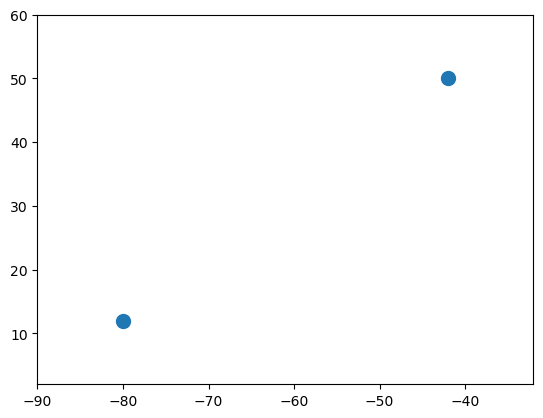

In [5]:
Xmoor0 = np.array([-80, -42])
Ymoor0 = np.array([12, 50])
plt.plot(Xmoor0, Ymoor0, ls='',marker='o', markersize=10)
plt.xlim(np.min(Xmoor0)-10, np.max(Xmoor0)+10)
plt.ylim(np.min(Ymoor0)-10, np.max(Ymoor0)+10)
plt.show()

[10]
CPU times: user 258 ms, sys: 42.8 ms, total: 301 ms
Wall time: 270 ms


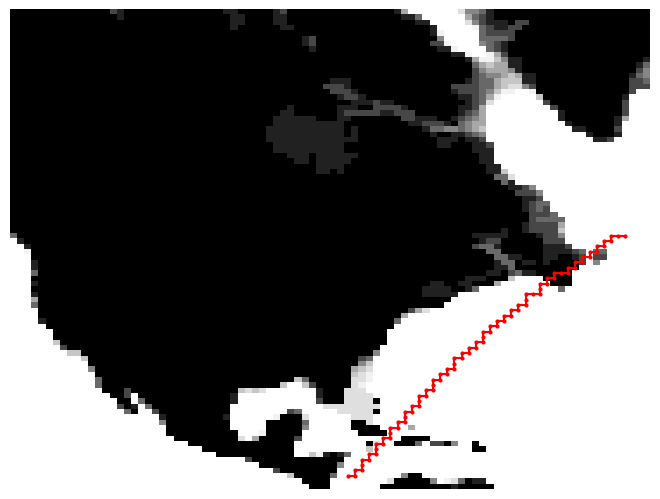

In [6]:
%%time
rectangular = False
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere']=R

_ = ECCOod.plot.faces_array(Ymoor=Ymoor0, Xmoor=Xmoor0, markersize=4, color='r', ls='-') #, figsize=(4, 4))

## 2) Faces 2 and 10

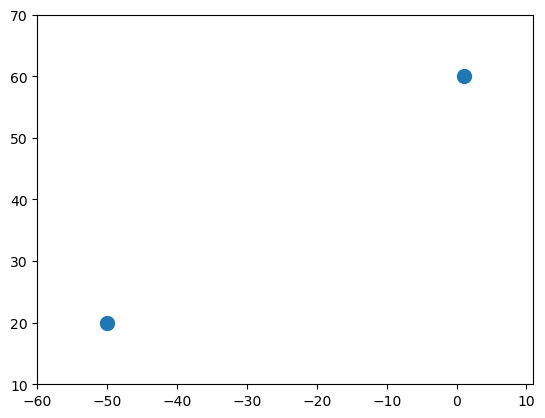

In [7]:
# Input data


Xmoor1 = np.array([-50, 1])
Ymoor1 = np.array([20, 60])
plt.plot(Xmoor1, Ymoor1, ls='',marker='o', markersize=10)
plt.xlim(np.min(Xmoor1)-10, np.max(Xmoor1)+10)
plt.ylim(np.min(Ymoor1)-10, np.max(Ymoor1)+10)
plt.show()

[10, 2]
face2axis:  {0: (2, 0, 1), 1: (10, 0, 0)}
CPU times: user 325 ms, sys: 33.7 ms, total: 359 ms
Wall time: 340 ms


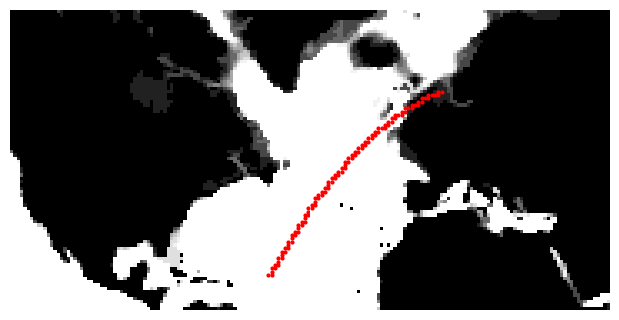

In [8]:
%%time
rectangular = False
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R
_ = ECCOod.plot.faces_array(Ymoor=Ymoor1, Xmoor=Xmoor1, figsize=(6, 3), markersize=4, color='r')

The face2axis dictionary for the case above is:
```python
face2axis =  {0: (2, 0, 1), 1: (10, 0, 0)}
```
The default is always: ```face2axis=None```. The code can infer the values above.

## 3) Spanning almost all latitude, input along single lat


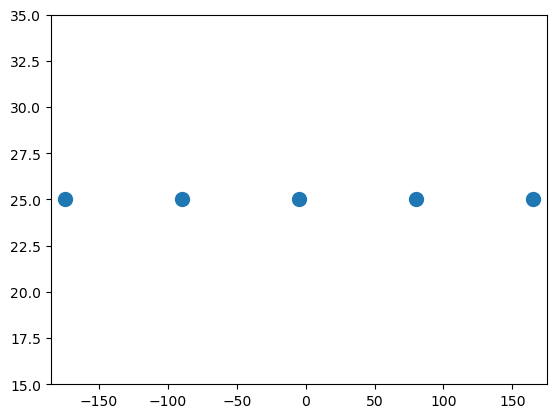

In [9]:
# Input data

Xmoor2 = np.arange(-175, 190, 85)
Ymoor2 = 25 * np.ones(np.shape(Xmoor2))

plt.plot(Xmoor2, Ymoor2, ls='',marker='o', markersize=10)
plt.xlim(np.min(Xmoor2)-10, np.max(Xmoor2)+10)
plt.ylim(np.min(Ymoor2)-10, np.max(Ymoor2)+10)
plt.show()

[7, 10, 2, 5, 7]
CPU times: user 1.87 s, sys: 131 ms, total: 2 s
Wall time: 1.93 s


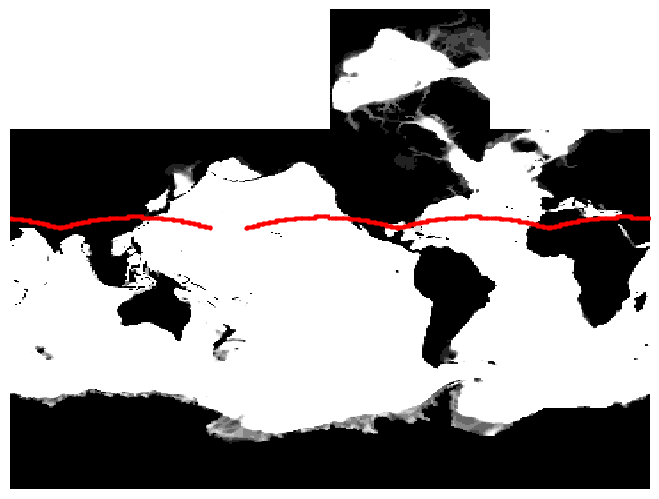

In [10]:
%%time
rectangular = False
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R

_ = ECCOod.plot.faces_array(Ymoor=Ymoor2, Xmoor=Xmoor2, color='r', markersize=4)

# 4) Two faces along a Facet

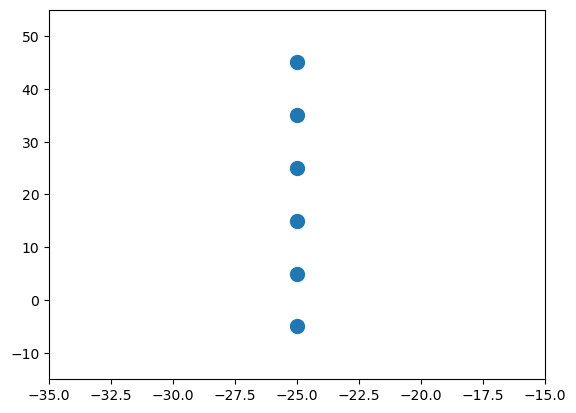

In [11]:
# Input Data

Ymoor3 = np.arange(-5, 50, 10)
Xmoor3 = -25 * np.ones(np.shape(Ymoor3))

plt.plot(Xmoor3, Ymoor3, ls='',marker='o', markersize=10)
plt.xlim(np.min(Xmoor3)-10, np.max(Xmoor3)+10)
plt.ylim(np.min(Ymoor3)-10, np.max(Ymoor3)+10)
plt.show()

[1, 2]
face2axis:  {0: (1, 1, 0), 1: (2, 0, 0)}
CPU times: user 329 ms, sys: 30.8 ms, total: 359 ms
Wall time: 343 ms


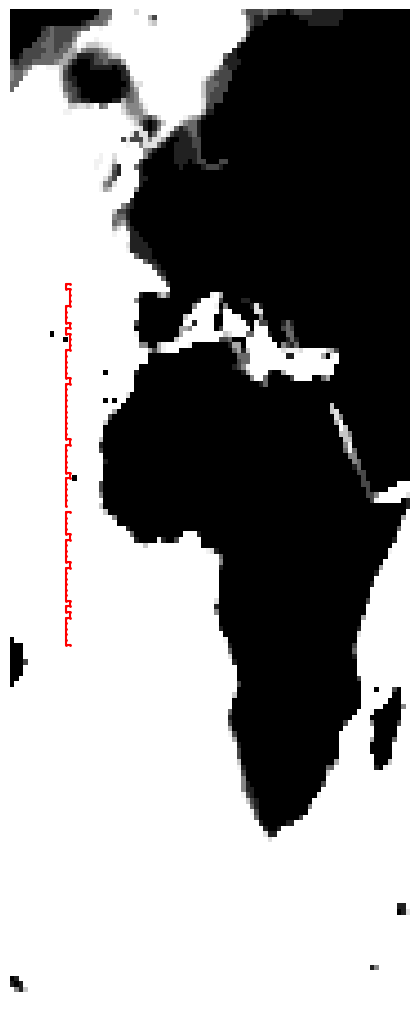

In [12]:
%%time 
rectangular = True
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R
_ = ECCOod.plot.faces_array(Ymoor=Ymoor3, Xmoor=Xmoor3, figsize=(4, 10), ls='-', color='r')

# 4) Two faces from different Facets

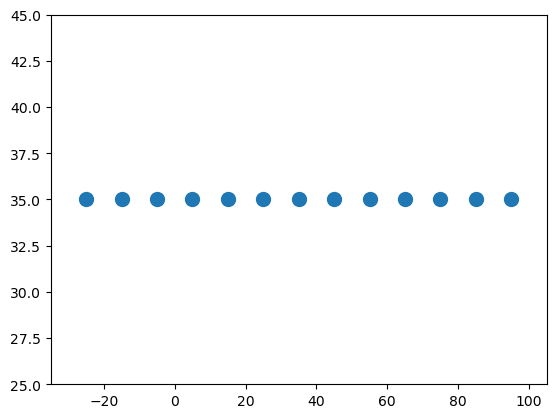

In [13]:
# Input data

Xmoor4 = np.arange(-25, 100, 10)
Ymoor4 = 35 * np.ones(np.shape(Xmoor4))

plt.plot(Xmoor4, Ymoor4, ls='',marker='o', markersize=10)
plt.xlim(np.min(Xmoor4)-10, np.max(Xmoor4)+10)
plt.ylim(np.min(Ymoor4)-10, np.max(Ymoor4)+10)
plt.show()

[2, 5]
face2axis:  {0: (2, 0, 0), 1: (5, 0, 1)}
CPU times: user 354 ms, sys: 34.2 ms, total: 388 ms
Wall time: 372 ms


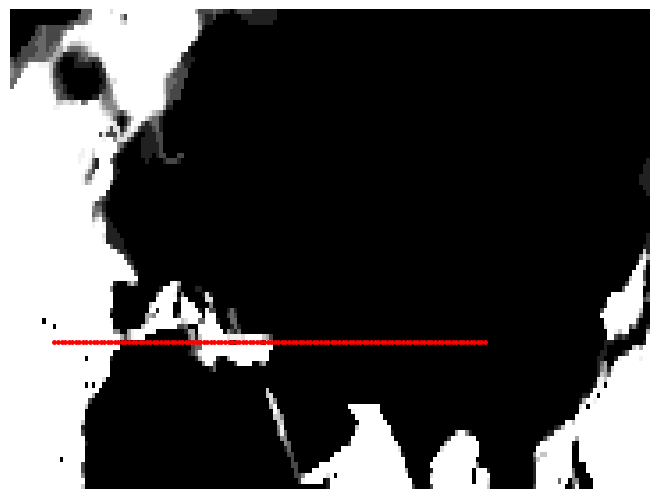

In [14]:
%%time
rectangular = True
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R

_ = ECCOod.plot.faces_array(Ymoor=Ymoor4, Xmoor=Xmoor4, color='r', markersize=5)

# Two faces within rotated Facet

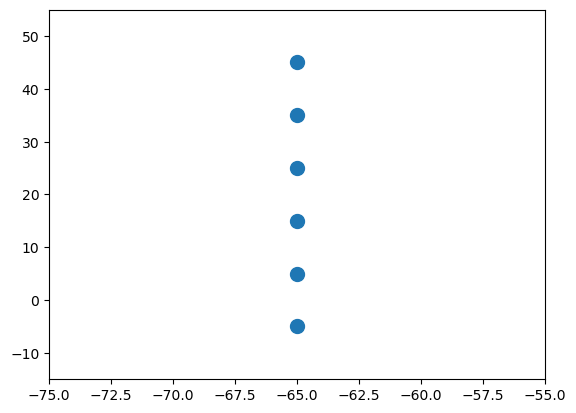

In [15]:
# Input data

Ymoor5 = np.arange(-5, 50, 10)
Xmoor5 = -65 * np.ones(np.shape(Ymoor5))

plt.plot(Xmoor5, Ymoor5, ls='',marker='o', markersize=10)
plt.xlim(np.min(Xmoor5)-10, np.max(Xmoor5)+10)
plt.ylim(np.min(Ymoor5)-10, np.max(Ymoor5)+10)
plt.show()

[11, 10]
face2axis:  {0: (11, 1, 0), 1: (10, 0, 0)}
CPU times: user 333 ms, sys: 32.7 ms, total: 366 ms
Wall time: 348 ms


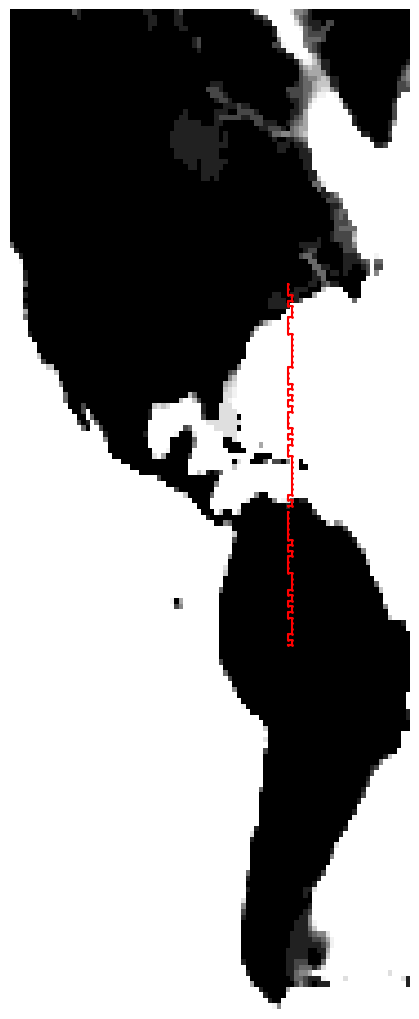

In [16]:
%%time
rectangular = False
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R

_ = ECCOod.plot.faces_array(Ymoor=Ymoor5, Xmoor=Xmoor5, figsize=(4, 10), color='r', ls='-')

In the case above, the following dictionary is inferred by the code to plot

```
face2axis:  {0: (11, 1, 0), 1: (10, 0, 0)}
```


# 6) 

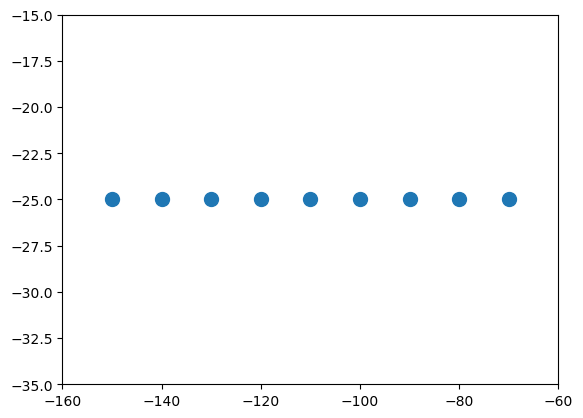

In [17]:
# Input data


Xmoor6 = np.arange(-150, -65, 10)
Ymoor6 = -25 * np.ones(np.shape(Xmoor6))

plt.plot(Xmoor6, Ymoor6, ls='',marker='o', markersize=10)
plt.xlim(np.min(Xmoor6)-10, np.max(Xmoor6)+10)
plt.ylim(np.min(Ymoor6)-10, np.max(Ymoor6)+10)
plt.show()

[8, 11]
face2axis:  {0: (8, 0, 0), 1: (11, 0, 1)}
CPU times: user 356 ms, sys: 29.2 ms, total: 385 ms
Wall time: 371 ms


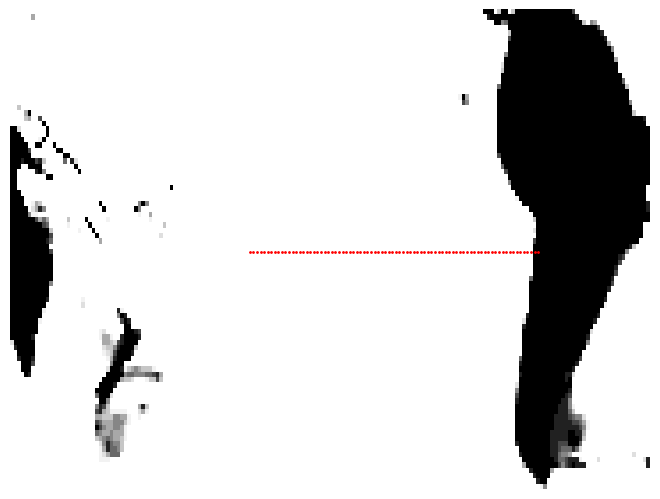

In [18]:
%%time
rectangular = True
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R
# plot
_ = ECCOod.plot.faces_array(Ymoor=Ymoor6, Xmoor=Xmoor6, color='r')

# 7) arctic face Example

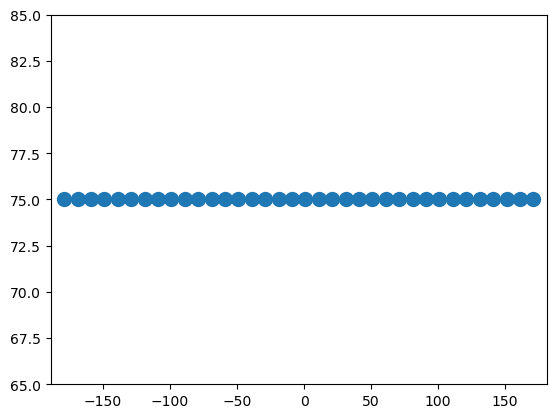

In [19]:
Xmoor7 = np.arange(-179, 180, 10)
Ymoor7 = 75 * np.ones(np.shape(Xmoor7))

plt.plot(Xmoor7, Ymoor7, ls='',marker='o', markersize=10)
plt.xlim(np.min(Xmoor7)-10, np.max(Xmoor7)+10)
plt.ylim(np.min(Ymoor7)-10, np.max(Ymoor7)+10)
plt.show()

[6]
CPU times: user 291 ms, sys: 26.6 ms, total: 317 ms
Wall time: 305 ms


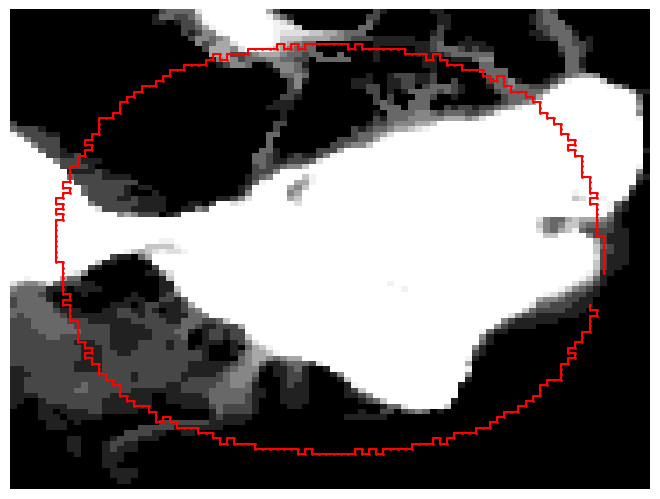

In [20]:
%%time
rectangular = False
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R

_ = ECCOod.plot.faces_array(Ymoor=Ymoor7, Xmoor=Xmoor7, color='r', ls='-')

## 8) Arctic + face 2

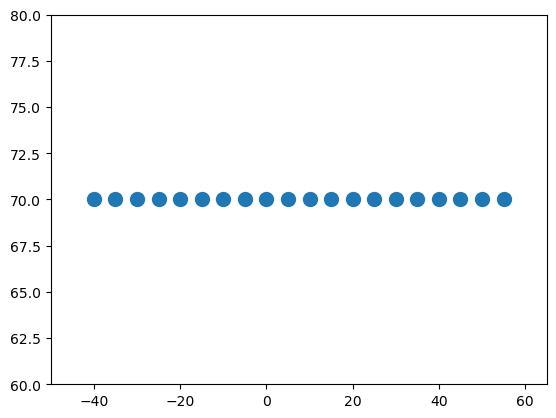

In [21]:
Xmoor8 = np.arange(-40, 60, 5)
Ymoor8 = 70 * np.ones(np.shape(Xmoor8))

plt.plot(Xmoor8, Ymoor8, ls='',marker='o', markersize=10)
plt.xlim(np.min(Xmoor8)-10, np.max(Xmoor8)+10)
plt.ylim(np.min(Ymoor8)-10, np.max(Ymoor8)+10)
plt.show()

[6, 2, 6, 2, 6]
face2axis:  {0: (2, 1, 0), 1: (6, 0, 0)}
CPU times: user 376 ms, sys: 33.1 ms, total: 409 ms
Wall time: 391 ms


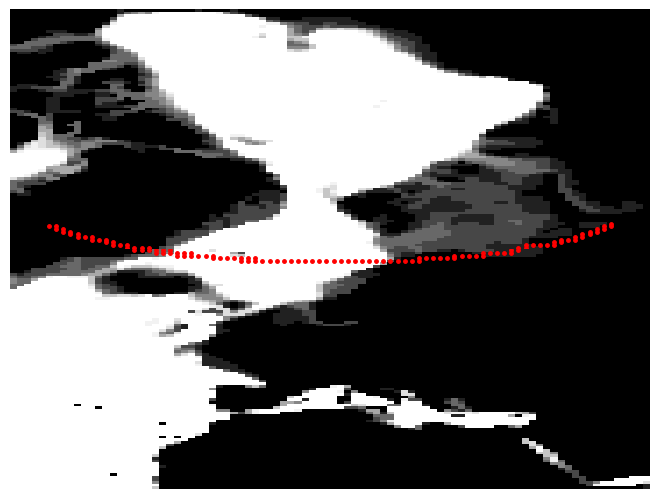

In [22]:
%%time
rectangular = False
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R

_ = ECCOod.plot.faces_array(Ymoor=Ymoor8, Xmoor=Xmoor8, color='r', markersize=5)

The dictionary below is inferred by the code to plot faces 2 and 6 together.
```python
face2axis:  {0: (2, 1, 0), 1: (6, 0, 0)}
```

## 9) Faces 6 and 10

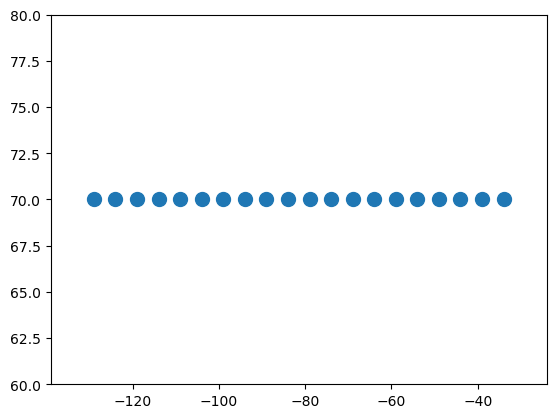

In [23]:
Xmoor9 = np.arange(-129, -30, 5)
Ymoor9 = 70 * np.ones(np.shape(Xmoor9))

plt.plot(Xmoor9, Ymoor9, ls='',marker='o', markersize=10)
plt.xlim(np.min(Xmoor9)-10, np.max(Xmoor9)+10)
plt.ylim(np.min(Ymoor9)-10, np.max(Ymoor9)+10)
plt.show()

[6, 10, 6, 10, 6]
face2axis:  {0: (10, 1, 0), 1: (6, 0, 0)}
CPU times: user 354 ms, sys: 25.5 ms, total: 380 ms
Wall time: 364 ms


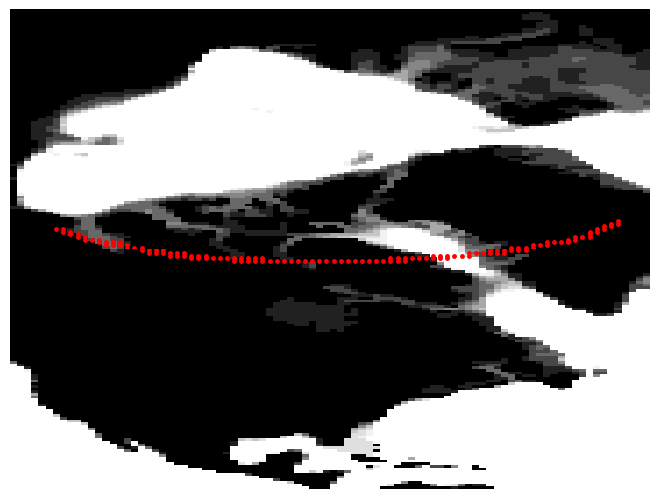

In [24]:
%%time
rectangular = False
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R
_ = ECCOod.plot.faces_array(Ymoor=Ymoor9, Xmoor=Xmoor9, markersize=5, color='r')#, face2axis=face2axis)

Dictionary inferred to plot above

```python
face2axis = {
    1: (6, 0, 0), 0: (10, 1, 0),
}
```


## 10) Faces 5 and 6

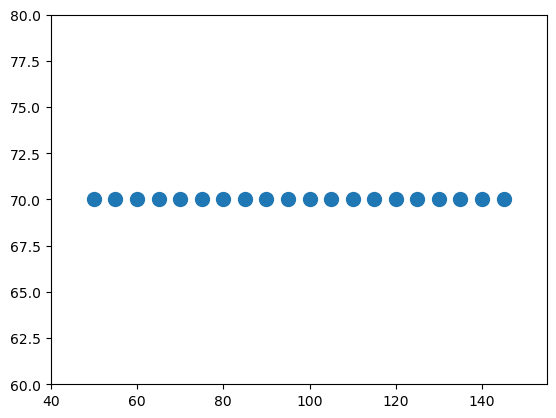

In [25]:
Xmoor10 = np.arange(50, 150, 5)
Ymoor10 = 70 * np.ones(np.shape(Xmoor10))

plt.plot(Xmoor10, Ymoor10, ls='',marker='o', markersize=10)
plt.xlim(np.min(Xmoor10)-10, np.max(Xmoor10)+10)
plt.ylim(np.min(Ymoor10)-10, np.max(Ymoor10)+10)
plt.show()

[6, 5, 6, 5, 6]
face2axis:  {0: (5, 1, 0), 1: (6, 0, 0)}
CPU times: user 338 ms, sys: 31.7 ms, total: 370 ms
Wall time: 353 ms


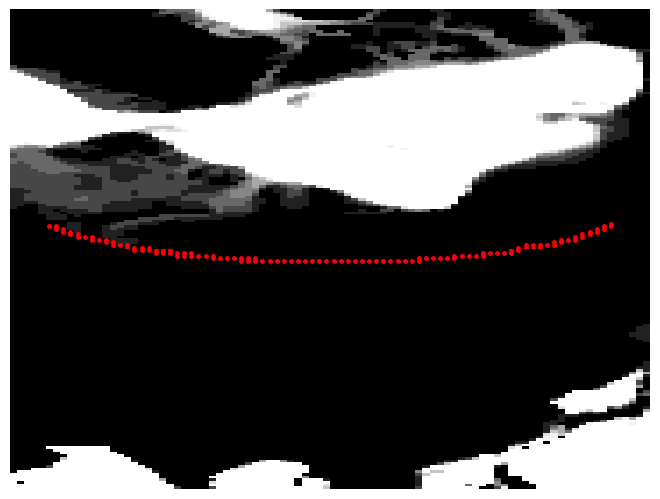

In [26]:
%%time
rectangular = False
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R
_ = ECCOod.plot.faces_array(Ymoor=Ymoor10, Xmoor=Xmoor10, color='r', markersize=5) #, face2axis=face2axis)

Dictionary above inferred to create plot

```python
face2axis = {
    1: (6, 0, 0), 0: (5, 1, 0), 
}
```


## 11) Faces 6 and 7

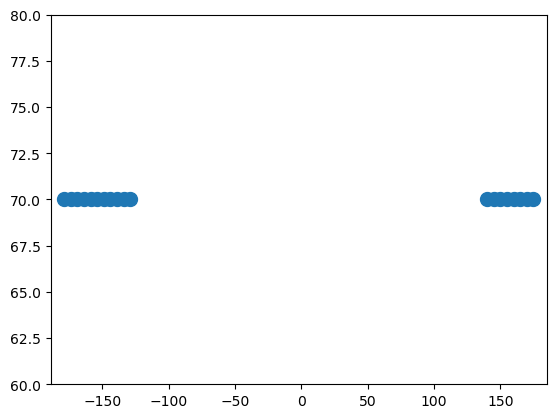

In [27]:
Xmoor11_1 = [k for k in range(140, 180, 5)]
Xmoor11_2 = [k for k in range(-179, -125, 5)]
Xmoor11 = np.array(Xmoor11_1+Xmoor11_2)

Ymoor11 = 70 * np.ones(np.shape(Xmoor11))

plt.plot(Xmoor11, Ymoor11, ls='',marker='o', markersize=10)
plt.xlim(np.min(Xmoor11)-10, np.max(Xmoor11)+10)
plt.ylim(np.min(Ymoor11)-10, np.max(Ymoor11)+10)
plt.show()

[6, 7, 6, 7, 6, 7, 6]
face2axis:  {0: (7, 1, 0), 1: (6, 0, 0)}
CPU times: user 395 ms, sys: 28.4 ms, total: 424 ms
Wall time: 408 ms


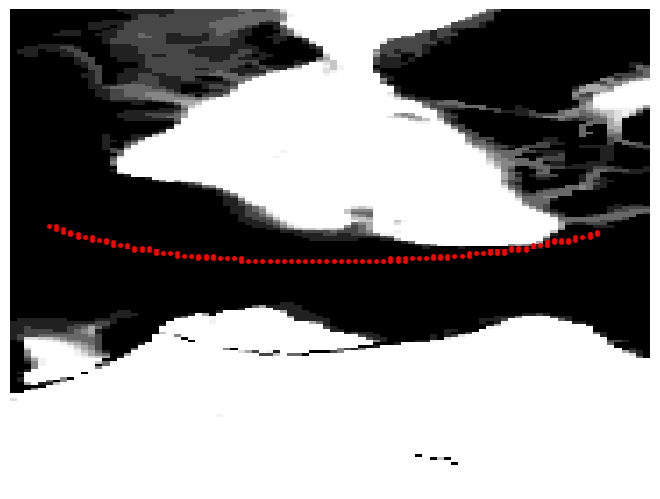

In [28]:
%%time
rectangular = True
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R
_ = ECCOod.plot.faces_array(Ymoor=Ymoor11, Xmoor=Xmoor11, color='r', markersize=5)

Dictionary below is inferred to create the plot
```python
{0: (7, 1, 0), 1: (6, 0, 0)}
```

## 12) Data from poseidon viewer

In [29]:
p = {"type":"FeatureCollection","features":[{"type":"Feature","properties":{"timeFrom":"2012-04-25T00:00:00.000Z","timeTo":"2012-05-04T23:00:00.000Z"},"geometry":{"type":"LineString","coordinates":[[-52.07048458149782,14.036813138364025],[-56.29955947136567,23.04690428822215],[-58.67841409691635,33.9389216386314],[-53.39207048458156,44.7360121183699],[-44.66960352422912,54.4571014644832],[-33.03964757709256,56.11260953864499],[-22.995594713656423,55.667944545860394],[-15.33039647577096,51.59698027558292],[-10.837004405286397,40.658911116686426],[-12.687224669603568,26.87986418422743],[-16.651982378854658,17.59648607343034],[-25.3744493392071,13.780245790804301],[-39.11894273127758,11.45903438051647],[-46.51982378854629,11.717963373208562],[-51.54185022026436,13.523396358343348]]}}]}

In [30]:
_, lats, lons = viewer2range(p)

extracting LineString


[10, 2, 10]
face2axis:  {0: (2, 0, 1), 1: (10, 0, 0)}
CPU times: user 392 ms, sys: 61.6 ms, total: 453 ms
Wall time: 397 ms


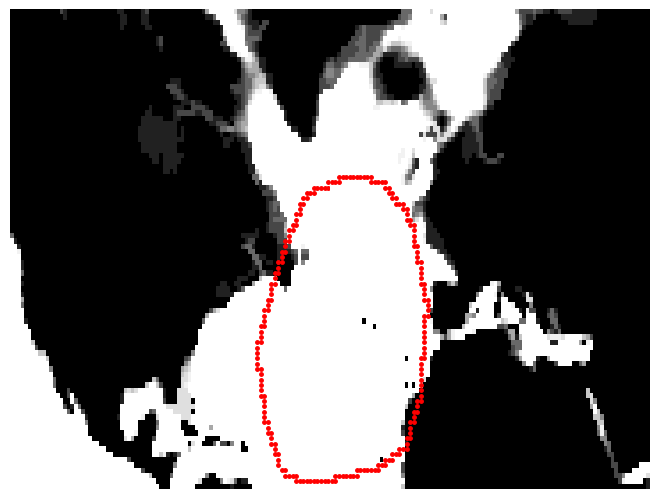

In [31]:
%%time
rectangular = False
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R
_ = ECCOod.plot.faces_array(Ymoor=lats, Xmoor=lons, color='r', markersize=5)

## 13) Data from poseidon viewer

In [32]:
p2 = {"type":"FeatureCollection","features":[{"type":"Feature","properties":{"timeFrom":"2012-04-25T00:00:00.000Z","timeTo":"2012-05-04T23:00:00.000Z"},"geometry":{"type":"LineString","coordinates":[[-531.5877396333852,1.0297316485661696],[-531.5877396333852,-16.33276911522519],[-518.8642469098925,-16.691555736452003],[-503.89543194107756,-15.973322902449752],[-500.9016689473146,-5.696770189367811],[-500.9016689473146,12.894590745931083],[-502.77277081841646,33.07689792768002],[-514.3736024192481,33.07689792768002],[-515.8704839161296,15.434258230126616],[-514.3736024192481,4.766483386258713],[-518.8642469098925,-3.458754793783129],[-526.3486543943001,5.884280709189156],[-525.8535657013848,18.896587475035005],[-525.225993271639,33.9876278595988]]}}]}

In [33]:
_, lats2, lons2 = viewer2range(p2)

extracting LineString


[8, 7, 8, 7]
face2axis:  {0: (8, 1, 0), 1: (7, 0, 0)}
CPU times: user 422 ms, sys: 61.5 ms, total: 484 ms
Wall time: 439 ms


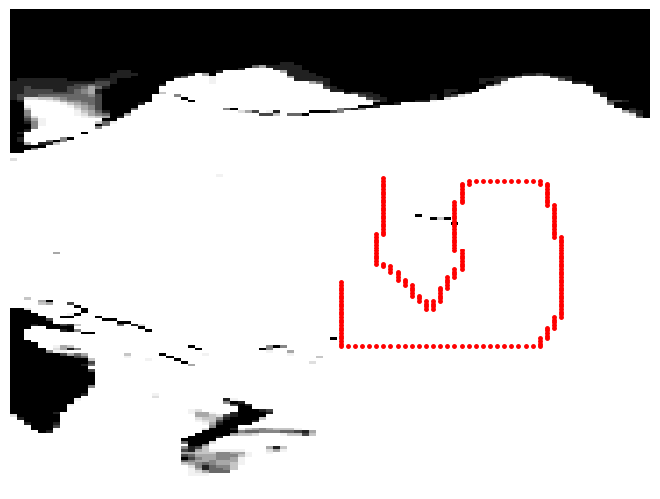

In [34]:
%%time
rectangular = False
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R
_ = ECCOod.plot.faces_array(Ymoor=lats2, Xmoor=lons2, color='r', markersize=5)

## 14) More data from poseidon viewer

In [35]:
p3 = {"type":"FeatureCollection","features":[{"type":"Feature","properties":{"timeFrom":"2012-04-25T00:00:00.000Z","timeTo":"2012-05-04T23:00:00.000Z"},"geometry":{"type":"LineString","coordinates":[[-534.5815026271483,6.969978028561329],[-475.0804631261088,8.082948720012851],[-474.70624275188845,-3.488779832463223],[-533.0846211302668,-3.1151813953859744],[-534.2072822529278,5.109345677041304]]}}]}

In [36]:
_, lats3, lons3 = viewer2range(p3)

extracting LineString


[8, 11, 8]
face2axis:  {0: (8, 0, 0), 1: (11, 0, 1)}
CPU times: user 391 ms, sys: 81 ms, total: 472 ms
Wall time: 395 ms


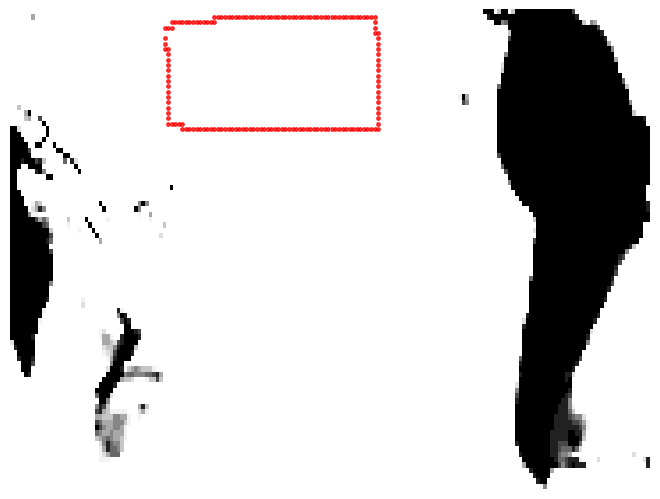

In [37]:
%%time
rectangular = False
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R
_ = ECCOod.plot.faces_array(Ymoor=lats3, Xmoor=lons3, color='r', markersize=5, alpha=0.75)

## 15) Data from poseidon viewer

In [38]:
p4= {"type":"FeatureCollection","features":[{"type":"Feature","properties":{"timeFrom":"2012-04-25T00:00:00.000Z","timeTo":"2012-05-04T23:00:00.000Z"},"geometry":{"type":"LineString","coordinates":[[-430.64179368743964,24.02595546675731],[-436.62931967496576,27.728680329162017],[-438.8746419202879,30.022292061668338],[-437.0035400491861,33.3647929149393],[-431.3902344358804,35.67694441779119],[-424.65426769991376,39.24033531851936],[-411.93077497642093,43.58768469772821],[-399.955723001369,46.880441373413305],[-384.79979784544383,47.00818307002899],[-374.5087375543836,42.63151963347704],[-377.50250054814654,26.563214654399545],[-386.85800990365595,13.229825745898339],[-400.1428331884792,11.951580781548486],[-417.16986021550616,14.682476464470781],[-430.2675733132193,23.68370429753712]]}}]}

In [39]:
_, lats4, lons4 = viewer2range(p4)

extracting LineString


[10, 2, 10]
face2axis:  {0: (2, 0, 1), 1: (10, 0, 0)}
CPU times: user 397 ms, sys: 56.8 ms, total: 454 ms
Wall time: 411 ms


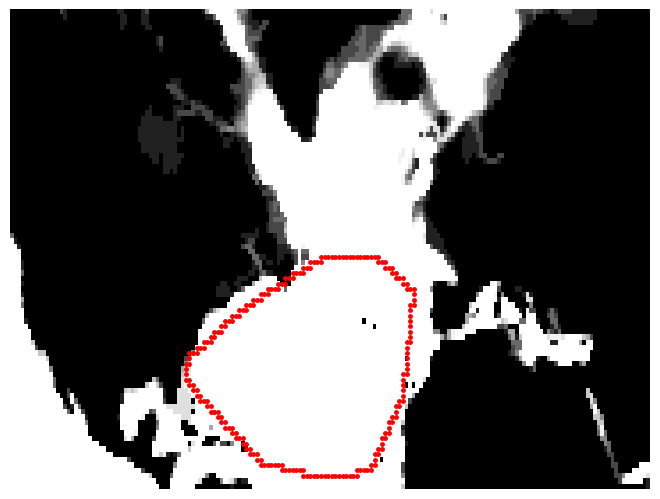

In [40]:
%%time
rectangular = True
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R
_ = ECCOod.plot.faces_array(Ymoor=lats4, Xmoor=lons4, color='r', markersize=5)

## 16) Data from pos viewer

In [41]:
p5 = {"type":"FeatureCollection","features":[{"type":"Feature","properties":{"timeFrom":"2012-04-25T00:00:00.000Z","timeTo":"2012-05-04T23:00:00.000Z"},"geometry":{"type":"LineString","coordinates":[[-382.07072425300197,63.3607280275489],[-383.07690403617414,60.32478917798272],[-383.479375949443,52.20401288209962],[-383.68061190607744,40.30641676095158],[-383.2781399928086,22.01737582916168],[-381.8694882963675,7.665723135871332],[-374.0212859876245,-6.184540541227776],[-370.19780281157017,-3.9797855375986586],[-370.39903876820466,2.857847139519947],[-373.82005003099,9.059361677098423],[-378.24724107694766,14.182395798214756],[-378.0460051203132,25.697323677473776],[-373.82005003099,38.439870900303816],[-369.39285898503243,45.74403603304776],[-372.0089264212801,51.45787172566898],[-371.20398259474234,57.52199204156233],[-366.37431963551586,60.12492336985591],[-373.4175781177212,63.719383187845466],[-382.07072425300197,63.3607280275489]]}}]}

_, lats5, lons5 = viewer2range(p5)

extracting LineString


[2, 1, 2]
face2axis:  {0: (1, 1, 0), 1: (2, 0, 0)}
CPU times: user 370 ms, sys: 30.3 ms, total: 400 ms
Wall time: 386 ms


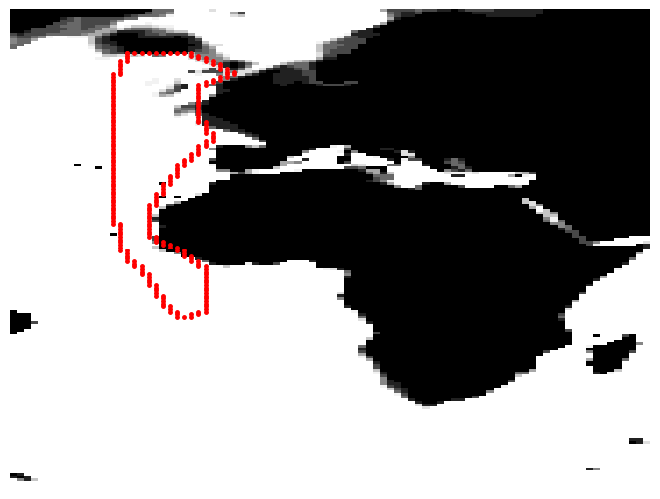

In [42]:
%%time
rectangular = False
if rectangular:
    R = None
else:
    R = 6371.0
ECCOod.parameters['rSphere'] = R
_ = ECCOod.plot.faces_array(Ymoor=lats5, Xmoor=lons5, color='r', markersize=5)

## 17) Example `faces2axis` is used

## Specify face2axis with 4 faces


**case 1)** horizontal

```python
## case 4 horizontal faces
face2axis = {
    0: (face1, 0, 0),
    1: (face2, 0, 1),
    2: (face3, 0, 2),
    3: (face4, 0, 3)
}
```


## Will use the input data from case 2) (single lat input).


In [43]:

face2axis = {
    0: (5, 0, 0),
    1: (7, 0, 1),
    2: (10, 0, 2),
    3: (2, 0, 3)
}

[7, 10, 2, 5, 7]
CPU times: user 1.17 s, sys: 85.8 ms, total: 1.26 s
Wall time: 1.2 s


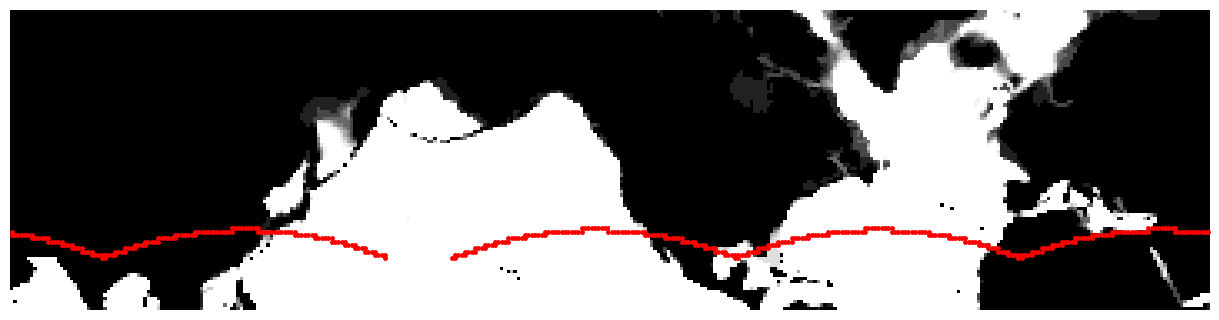

In [44]:
%%time
R = 6371.0
rectangular = True
if rectangular:
    R = None
ECCOod.parameters['rSphere'] = R

_ = ECCOod.plot.faces_array(Ymoor=Ymoor2, Xmoor=Xmoor2, figsize=(12, 3), face2axis=face2axis, color='r', markersize=5)

## 18) Example: 6E (1 facet + arctic)

Without the `face2axis`, the plot involves all faces.


In [45]:
Ymoor6E = np.arange(-60, 77.5, 15)
Xmoor6E = np.array([6]*len(Ymoor6E))

face2axis = {
    0: (6, 0, 0), # arctic face
    1: (2, 1, 0),
    2: (1, 2, 0),
    3: (0, 3, 0)
}



[0, 1, 2, 6]
CPU times: user 571 ms, sys: 58.3 ms, total: 629 ms
Wall time: 579 ms


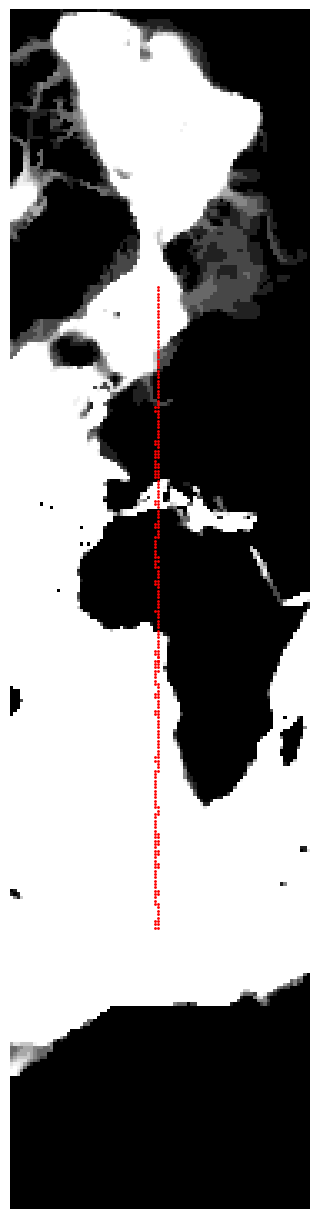

In [46]:
%%time
R = 6371.0
rectangular = False
if rectangular:
    R = None
ECCOod.parameters['rSphere'] = R

_ = ECCOod.plot.faces_array(Ymoor=Ymoor6E, Xmoor=Xmoor6E, figsize=(3, 12), face2axis=face2axis, color='r')

# 90 W

Without the `face2axis`, the plot involves all faces.


In [47]:
Ymoor90W = np.arange(-60, 77.5, 15)
Xmoor90W = np.array([-90]*len(Ymoor90W))

face2axis = {
    0: (6, 0, 0), # arctic face
    1: (10, 1, 0),
    2: (11, 2, 0),
    3: (12, 3, 0)
}


[12, 11, 10, 6]
CPU times: user 596 ms, sys: 56.5 ms, total: 653 ms
Wall time: 616 ms


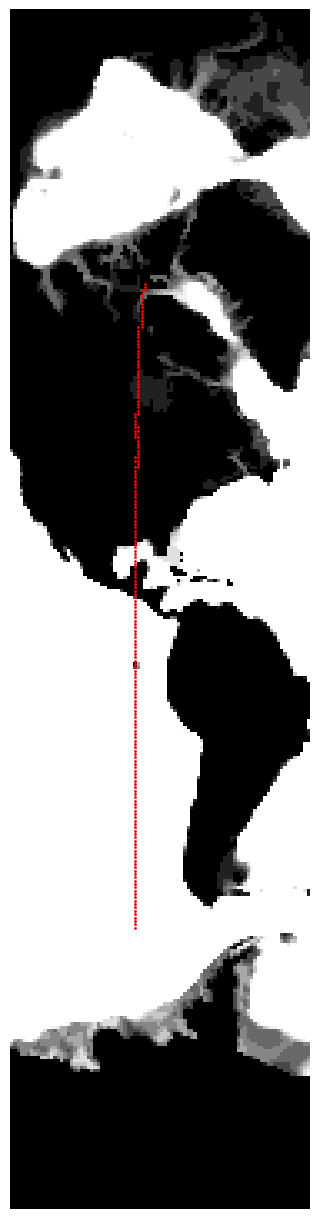

In [48]:
%%time
R = 6371.0
rectangular = False
if rectangular:
    R = None
ECCOod.parameters['rSphere'] = R

_ = ECCOod.plot.faces_array(Ymoor=Ymoor90W, Xmoor=Xmoor90W, figsize=(3, 12),color='r', face2axis=face2axis)

# 170 W
Without the `face2axis`, the plot involves all faces.


In [49]:
Ymoor170W = np.arange(-60, 77.5, 15)
Xmoor170W = np.array([-170]*len(Ymoor170W))

face2axis = {
    0: (6, 0, 0), # arctic face
    1: (7, 1, 0),
    2: (8, 2, 0),
    3: (9, 3, 0)
}


[9, 8, 7, 6]
CPU times: user 549 ms, sys: 50.1 ms, total: 599 ms
Wall time: 579 ms


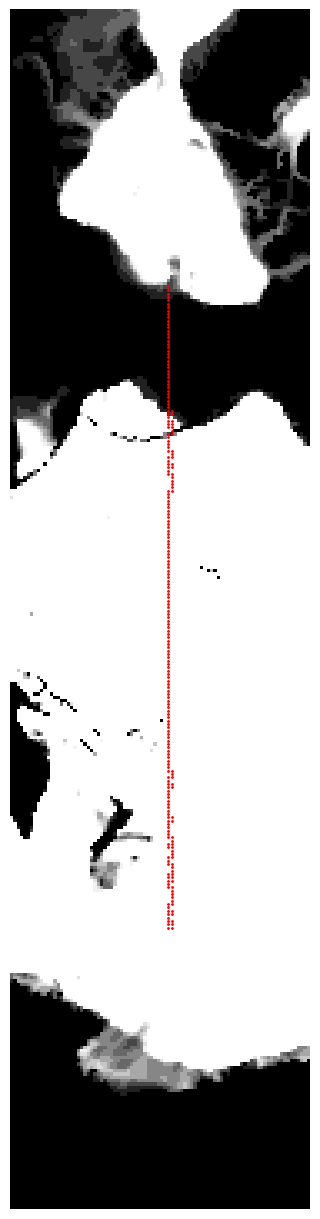

In [50]:
%%time
R = 6371.0
rectangular = False
if rectangular:
    R = None
ECCOod.parameters['rSphere'] = R

_ = ECCOod.plot.faces_array(Ymoor=Ymoor170W, Xmoor=Xmoor170W, figsize=(3, 12),color='r', face2axis=face2axis)

# 90 E

Without the `face2axis`, the plot involves all faces.


In [51]:
Ymoor90E = np.arange(-60, 77.5, 15)
Xmoor90E = np.array([90]*len(Ymoor90E))

face2axis = {
    0: (6, 0, 0), # arctic face
    1: (5, 1, 0),
    2: (4, 2, 0),
    3: (3, 3, 0)
}


[3, 4, 5, 6]
CPU times: user 504 ms, sys: 47.4 ms, total: 552 ms
Wall time: 514 ms


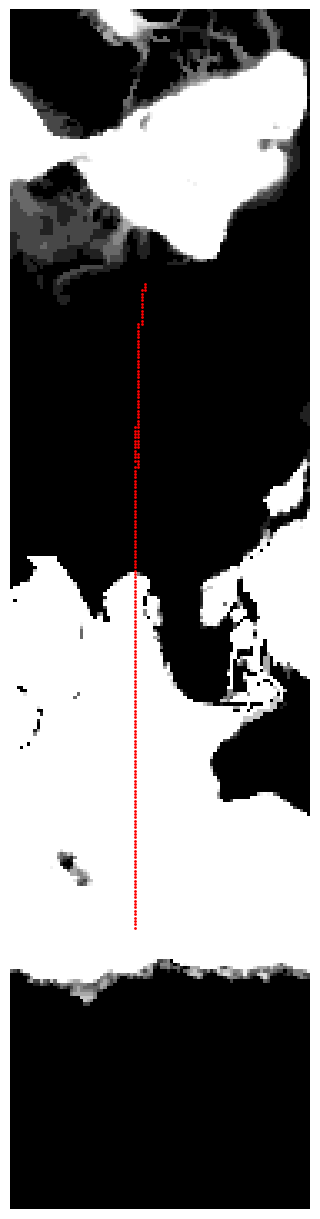

In [52]:
%%time
R = 6371.0
rectangular = False
if rectangular:
    R = None
ECCOod.parameters['rSphere'] = R

_ = ECCOod.plot.faces_array(Ymoor=Ymoor90E, Xmoor=Xmoor90E, figsize=(3, 12),color='r', face2axis=face2axis)